In [2]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Load the dataset
data = pd.read_csv('winequality-red.csv', delimiter=';')  # Adjust the filename if needed
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [7]:
# EDA - Exploratory Data Analysis
print("Dataset Summary:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   

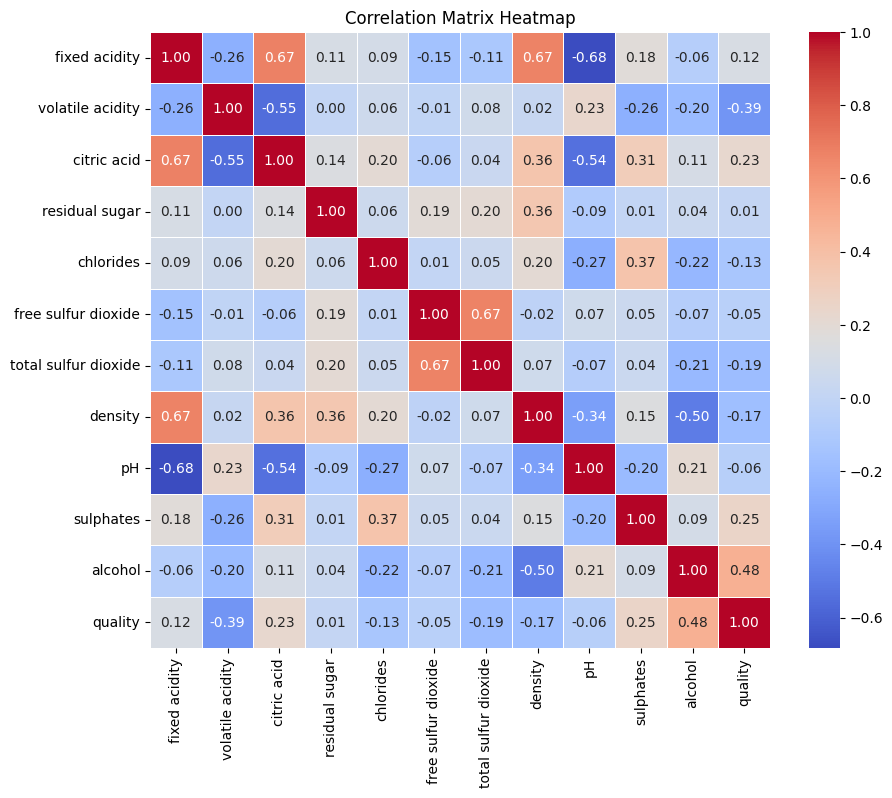

In [8]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\raula\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


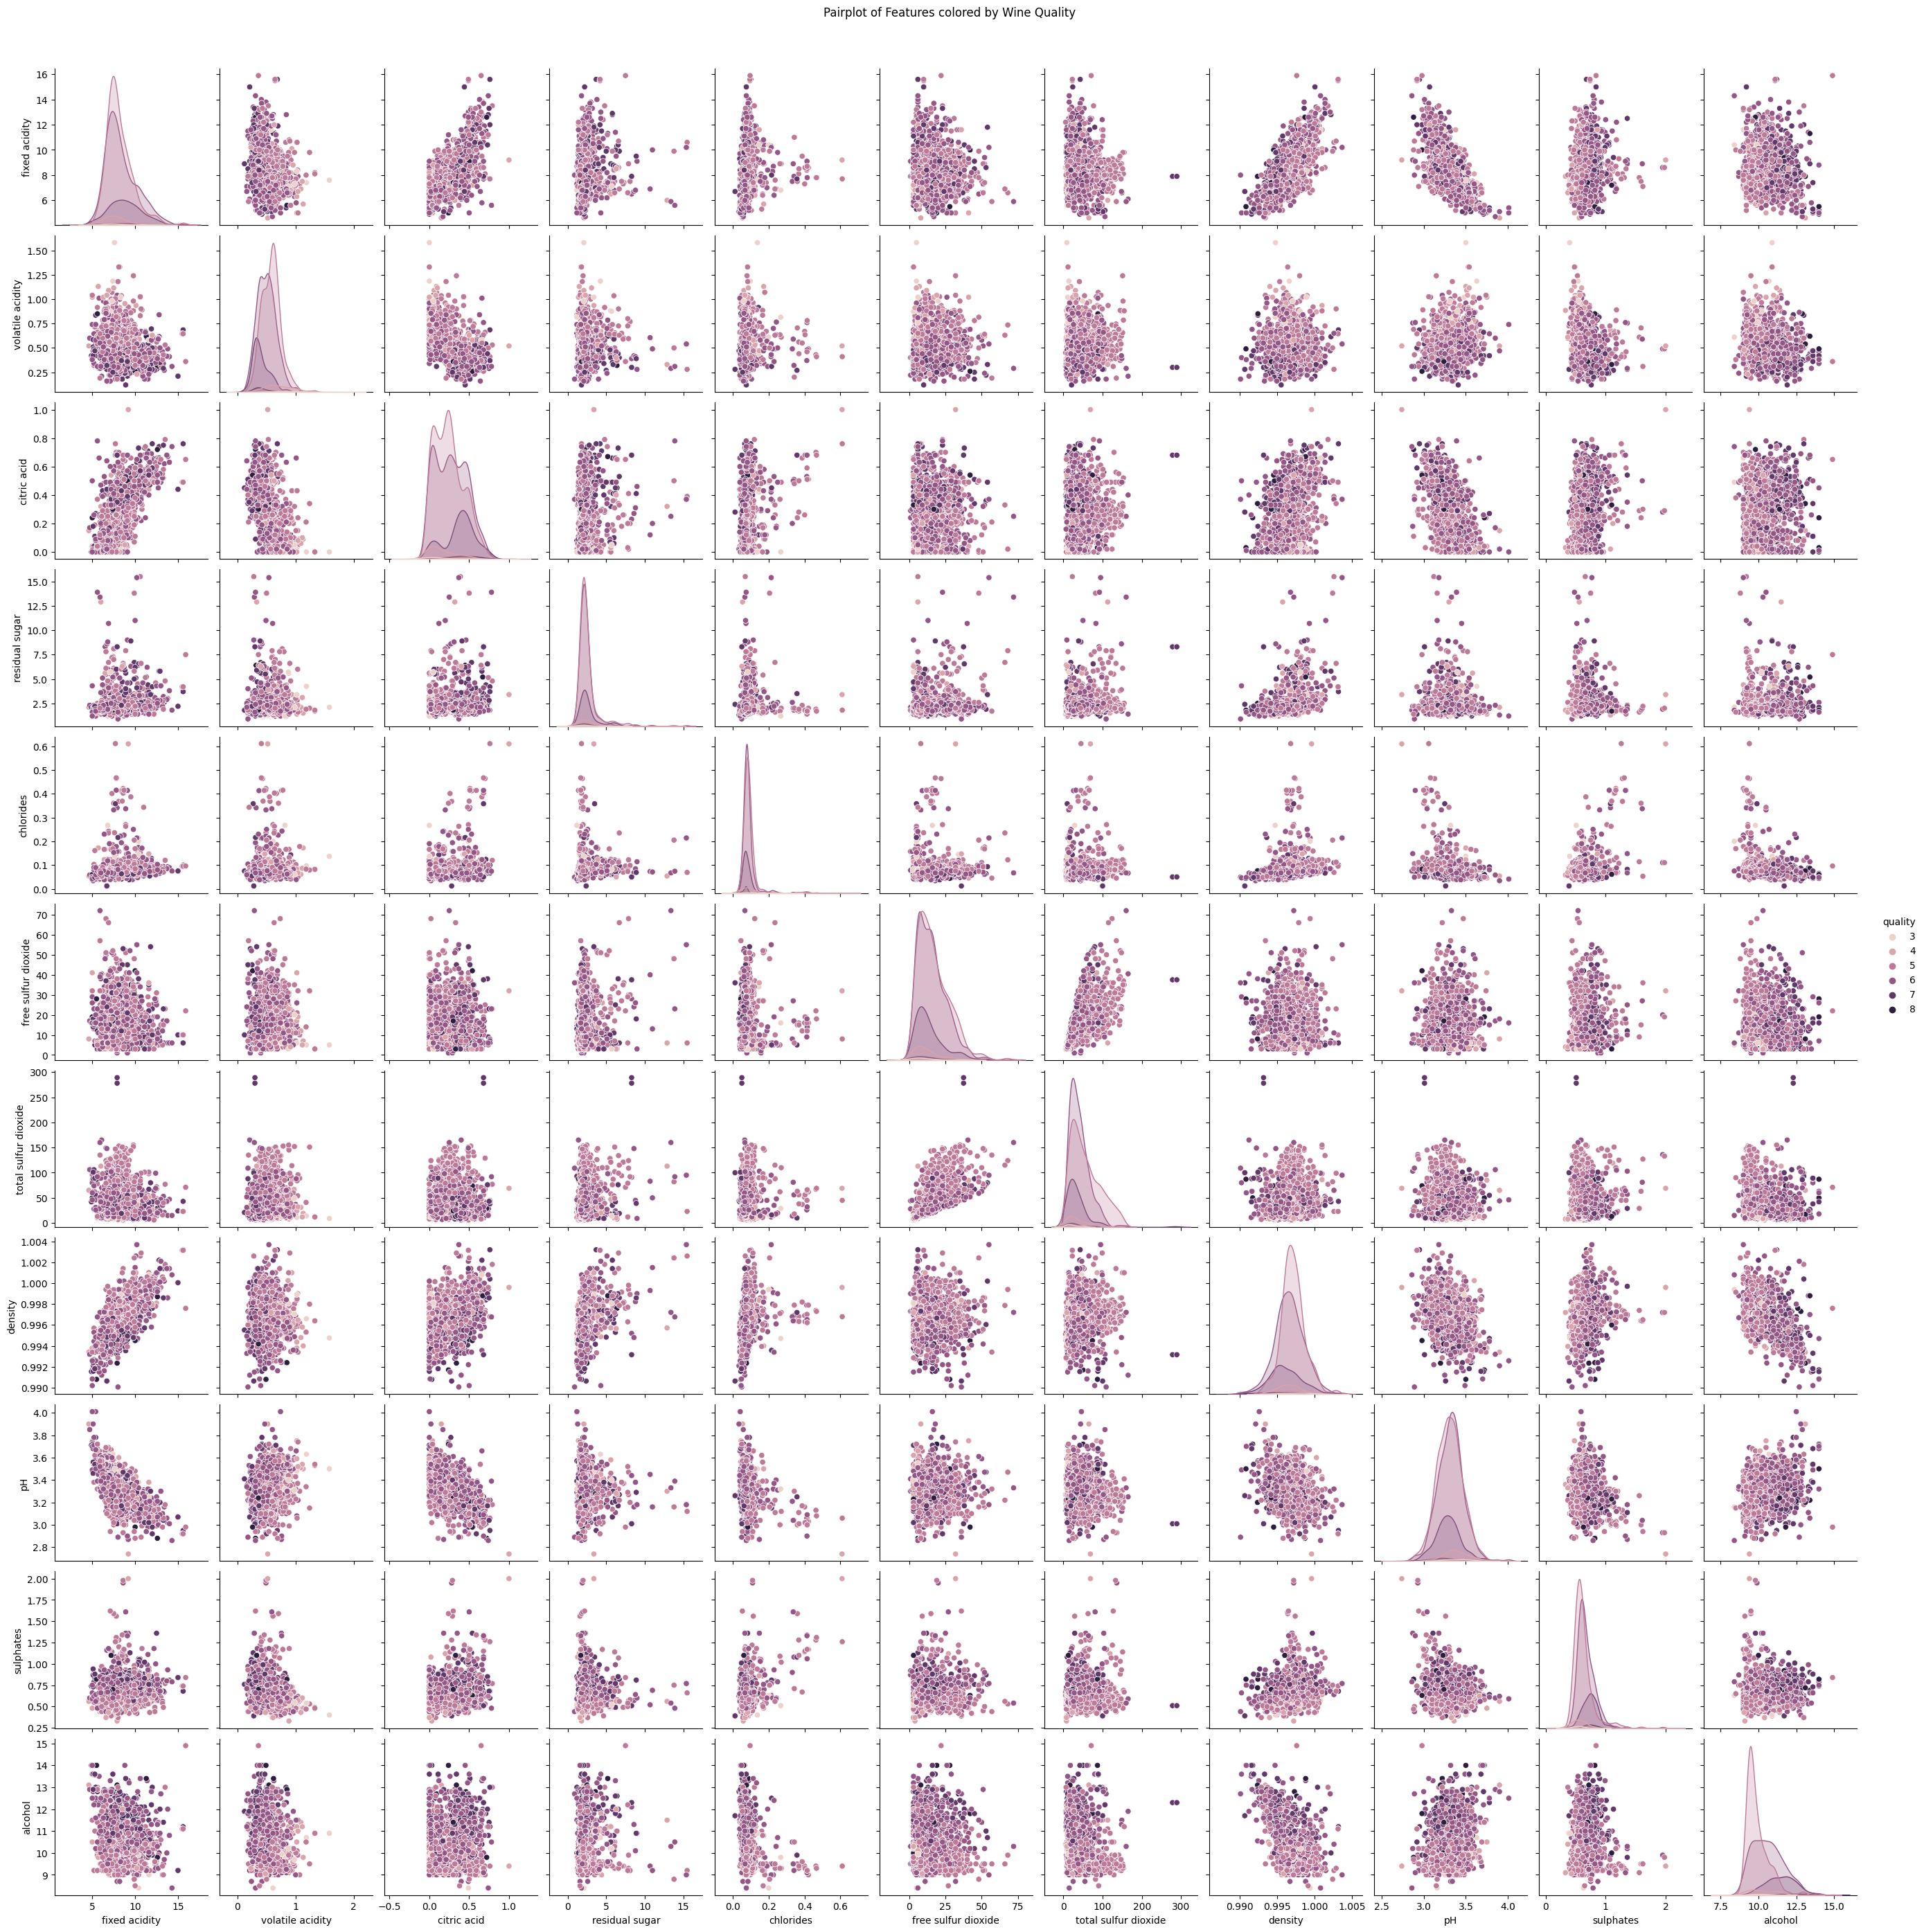

In [9]:
# Pairplot
sns.pairplot(data, hue='quality', diag_kind='kde')
plt.suptitle("Pairplot of Features colored by Wine Quality", y=1.02)
plt.show()

In [10]:
# Prepare the data
X = data.drop('quality', axis=1)  # Features (chemical properties)
y = data['quality']  # Target (wine quality)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge()
}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {name} ---")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    print("Cross-Validation Mean R-squared:", np.mean(cv_scores))

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled, y)

print("--- Random Forest Hyperparameter Tuning ---")
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

--- Linear Regression ---
Mean Squared Error: 0.390025143963955
R-squared: 0.40318034127962177
Cross-Validation Mean R-squared: 0.2900416288421964
--- Random Forest ---
Mean Squared Error: 0.3013528125
R-squared: 0.5388674666387723
Cross-Validation Mean R-squared: 0.3081286839917401
--- Support Vector Regression ---
Mean Squared Error: 0.3516070039083476
R-squared: 0.4619680927656601
Cross-Validation Mean R-squared: 0.31630129485824676
--- Gradient Boosting Regression ---
Mean Squared Error: 0.3644197643648829
R-squared: 0.4423619021359553
Cross-Validation Mean R-squared: 0.31980101478180367
--- Ridge Regression ---
Mean Squared Error: 0.3900365808244968
R-squared: 0.4031628405022718
Cross-Validation Mean R-squared: 0.2901184421546302
--- Random Forest Hyperparameter Tuning ---
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best R-squared: 0.3268857643195551


In [12]:
# Neural Network using TensorFlow/Keras
def create_neural_network():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

nn_model = create_neural_network()
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the Neural Network model
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("--- Neural Network ---")
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)

10/10 [==============================] - 0s 2ms/step
--- Neural Network ---
Mean Squared Error: 0.3751824849214424
R-squared: 0.42589269929383733
